## Estimating the probability of a female birth, Laplace's data

Laplace estimated the proportion of girl births. A total of 241,945 girls and 251,527 boys were born in Paris from 1745 to 1770. In analyzing the binomial model, Laplace used the uniform prior distribution. Let be $\theta$ the **probability of a female birth** and $y|\theta$ the observed female births. The model is then $$\theta\sim \textsf{Uniform}(0,1)$$ and $$y|\theta\sim\textsf{Binomial}(n,\theta),$$ where $n$ is the total number of births.

In [1]:
import arviz as az
import pymc3 as pm

from scipy.stats import beta

In [2]:
fem_births = 241945
mal_births = 251527
births = fem_births + mal_births

In [3]:
with pm.Model() as model_Laplace:
    theta = pm.Uniform('theta', lower=0, upper=1)
    obs = pm.Binomial('observed', n=births, p=theta, observed=fem_births)

    trace_Laplace = pm.sample()

/tmp/ipykernel_5467/4224582183.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_Laplace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


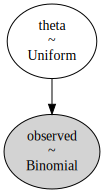

In [4]:
pm.model_to_graphviz(model_Laplace)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

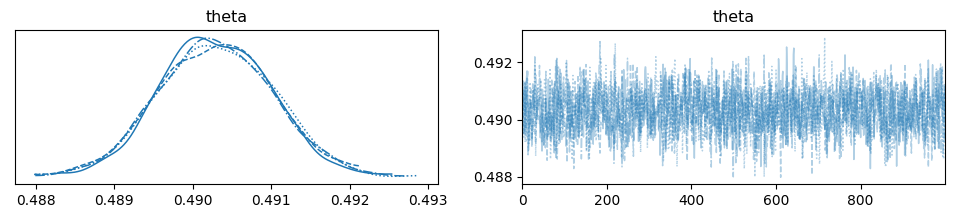

In [5]:
az.plot_trace(trace_Laplace)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

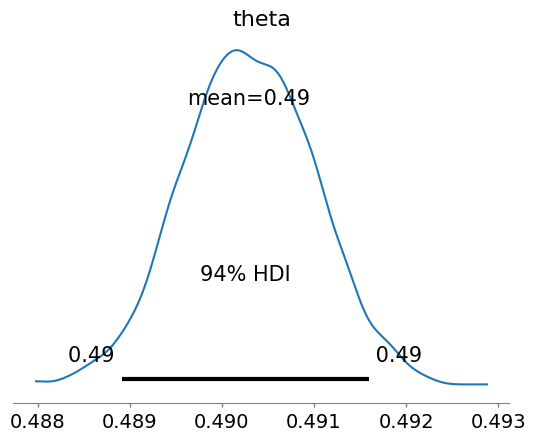

In [6]:
az.plot_posterior(trace_Laplace)

In [9]:
(trace_Laplace['theta']>=0.5).mean()

0.0

In [10]:
beta.sf(0.5, fem_births+1, mal_births+1)

1.1460584901556499e-42

The currently accepted value of the proportion of female births in large European populations is 0.485.

## Probability of a girl birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus. An early study concerning the sex of placenta previa births in Germany found of a total of 980 births, 437 were female.

In [11]:
births = 987
fem_births = 437

In [12]:
with pm.Model() as model_placenta_previa:
    theta = pm.Uniform('theta', lower=0, upper=1)
    natural = pm.Deterministic('logit(theta)', pm.logit(theta))
    phi = pm.Deterministic('(1-theta)/theta', (1 - theta) / theta)
    obs = pm.Binomial('observed', n=births, p=theta, observed=fem_births)

    trace_placenta_previa = pm.sample()

/tmp/ipykernel_5467/3463825087.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_placenta_previa = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


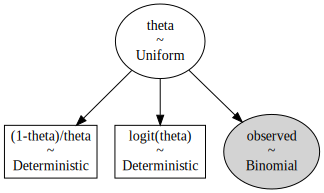

In [13]:
pm.model_to_graphviz(model_placenta_previa)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>],
       [<AxesSubplot:title={'center':'logit(theta)'}>,
        <AxesSubplot:title={'center':'logit(theta)'}>],
       [<AxesSubplot:title={'center':'(1-theta)/theta'}>,
        <AxesSubplot:title={'center':'(1-theta)/theta'}>]], dtype=object)

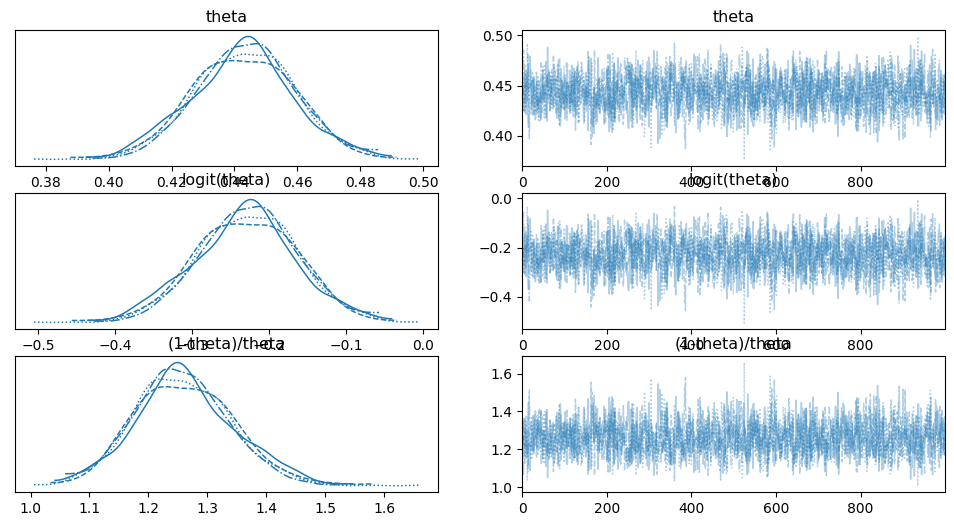

In [15]:
pm.plot_trace(trace_placenta_previa)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta'}>,
       <AxesSubplot:title={'center':'logit(theta)'}>,
       <AxesSubplot:title={'center':'(1-theta)/theta'}>], dtype=object)

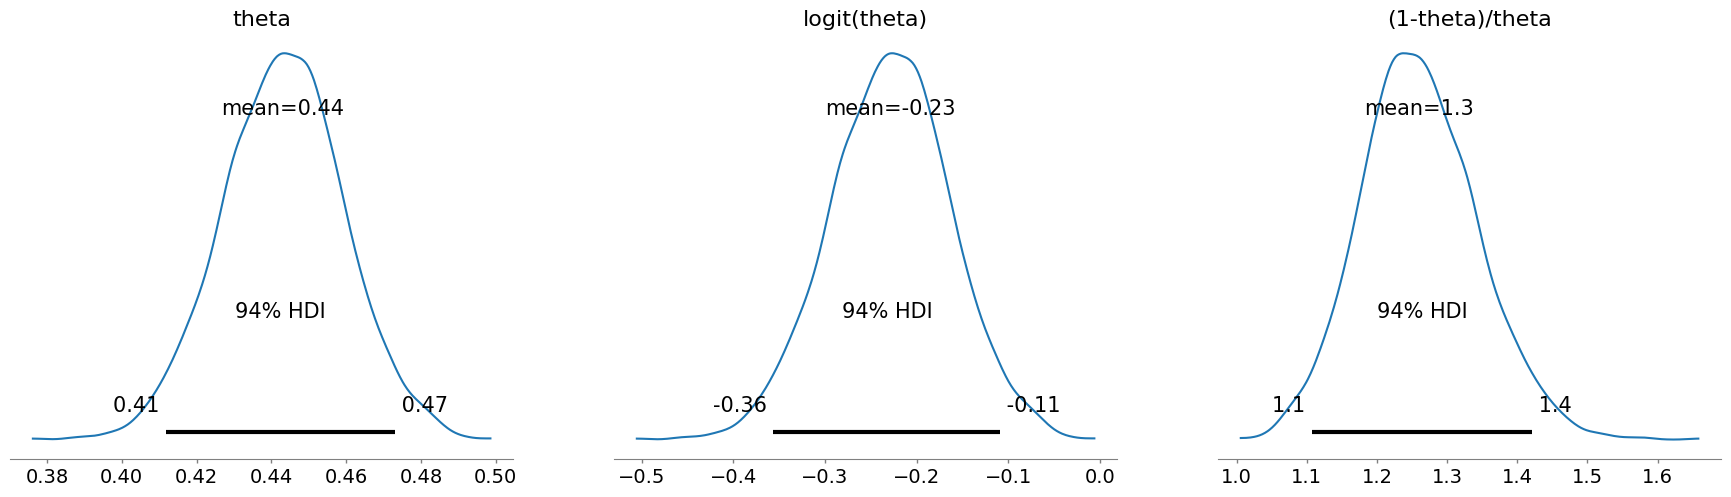

In [16]:
az.plot_posterior(trace_placenta_previa)

In [17]:
az.summary(trace_placenta_previa)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.443,0.016,0.412,0.473,0.000,0.000,1686.0,2463.0,1.0
logit(theta),-0.229,0.066,-0.357,-0.108,0.002,0.001,1686.0,2463.0,1.0
(1-theta)/theta,1.260,0.083,1.107,1.421,0.002,0.001,1686.0,2447.0,1.0


**Analysis using a nonconjugate prior distribution**

And with a custom prior distribution, a triangular one with a uniform distribution to the left and a uniform distribution to the right. 

In [18]:
def triangular(central_num, width):
    
    left_num = central_num - width
    right_num = central_num + width
    theta = pm.Triangular('theta', lower=left_num, upper=right_num, c=central_num)
        
    return(theta)

Remember, you can play with `width`. In this case, `width=0.09`

In [19]:
central_num = 0.485
width = 0.09

with pm.Model() as model_placenta_previa_noconjugate:
    theta = triangular(central_num, width)
    obs = pm.Binomial('observed', n=births, p=theta, observed=fem_births)
    trace_noconjugate = pm.sample()

/tmp/ipykernel_5467/2158423908.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_noconjugate = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


And the posterior distribution for $\theta$ is this.

Got error No model on context stack. trying to find log_likelihood in translation.
/home/dmitri/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

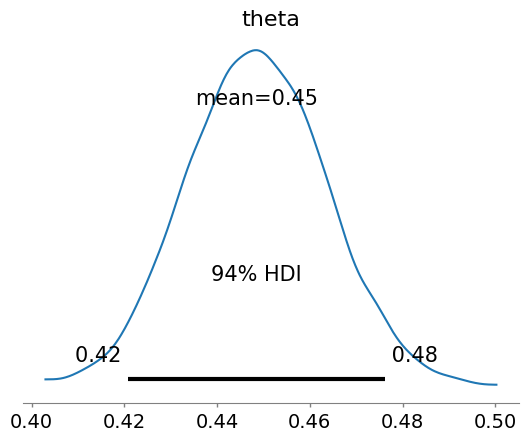

In [20]:
az.plot_posterior(trace_noconjugate, var_names='theta')

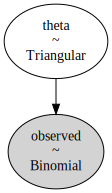

In [21]:
pm.model_to_graphviz(model_placenta_previa_noconjugate)